In [12]:
import ROOT
import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import torch.nn as nn
import torchvision
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
torch.manual_seed(114514)

In [13]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [14]:
#construct the model
class custom1(nn.Module):
    def __init__(self, in_dim) -> None:
        super().__init__()
        self.input = nn.Linear(in_dim, 100)
        self.layer0 = nn.Linear(100, 75)
        self.layer1 = nn.Linear(75,75)
        self.layer2 = nn.Linear(75,50)
        self.output = nn.Linear(50, 1)

    def forward(self, x):
        x = nn.ReLU()(self.input(x))
        x = nn.Tanh()(self.layer0(x))
        x = nn.ReLU()(self.layer1(x))
        x = nn.ReLU()(self.layer2(x))
        output = nn.Sigmoid()(self.output(x))
        return output


In [15]:
#loading dataset for training
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.RandomHorizontalFlip]
)

b_jet = (pd.read_csv("/global/cscratch1/sd/ricardom/b_jet.csv")).to_numpy()
c_jet = (pd.read_csv("/global/cscratch1/sd/ricardom/c_jet.csv")).to_numpy()
data_X = np.concatenate((b_jet, c_jet)) #data
#creating label for c_jet and b_jet: c -> 1, b -> 0
b_label = np.zeros((b_jet.shape[0]))
c_label = np.ones((c_jet.shape[0]))
data_y = np.concatenate((b_label, c_label)) #label for data
#split train and validation set:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: b-jet 10000
Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c-jet 2000
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).


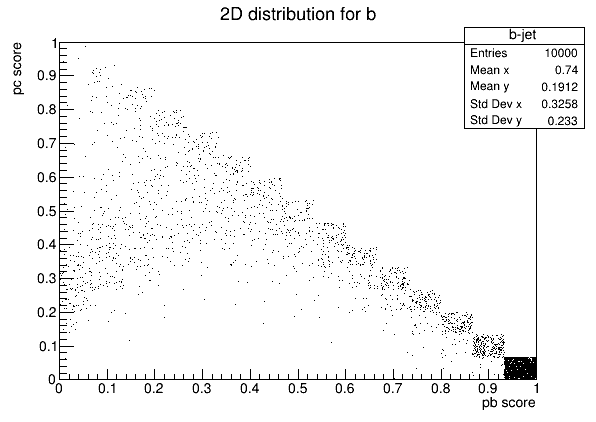

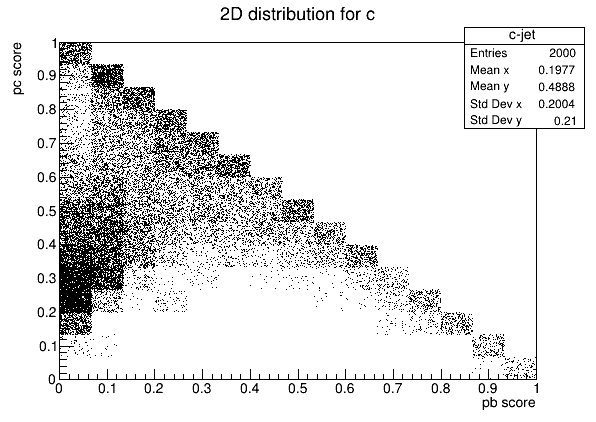

In [16]:
#plot 2d distribution for each jet with 1e4 scales of sample
num = int(1e4)
b = ROOT.TCanvas("b-jet {}".format(num),"The Canvas Title",600,450)
b_2D = ROOT.TH2F("b-jet", "2D distribution for b", 15, 0, 1, 15, 0, 1)
b_2D.FillN(num, b_jet[:, 0], b_jet[:, 1], 1/num*np.ones(num))
b_2D.Draw()
b.cd()
b_2D.GetYaxis().SetTitle("pc score")
b_2D.GetXaxis().SetTitle("pb score")
b.Draw()


num = int((1e4)/5)
c = ROOT.TCanvas("c-jet {}".format(num),"The Canvas Title",600,450)
c_2D = ROOT.TH2F("c-jet", "2D distribution for c", 15, 0, 1, 15, 0, 1)
c_2D.FillN(num, c_jet[:, 0], c_jet[:, 1], 1/num*np.ones(num))
c_2D.Draw()
c.cd()
c_2D.GetYaxis().SetTitle("pc score")
c_2D.GetXaxis().SetTitle("pb score")
c.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).


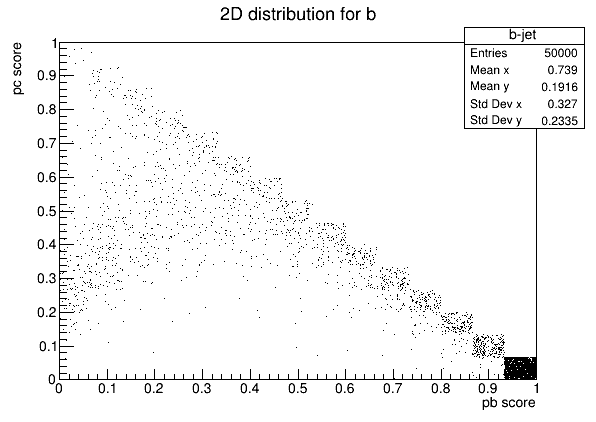

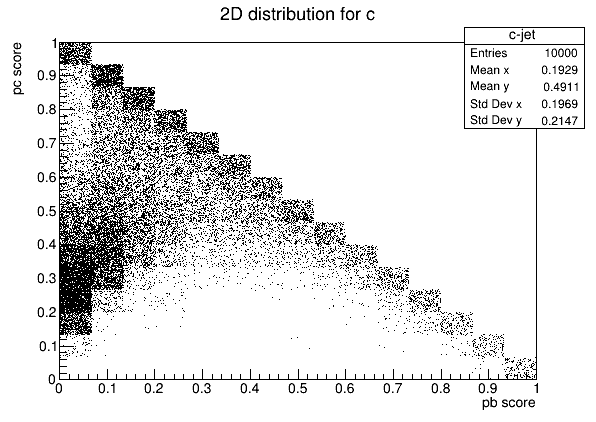

In [17]:
#plot 2d distribution for each jet with 5e4 scales of sample
num = int(5e4)
b = ROOT.TCanvas("b-jet {}".format(num),"The Canvas Title",600,450)
b_2D = ROOT.TH2F("b-jet", "2D distribution for b", 15, 0, 1, 15, 0, 1)
b_2D.FillN(num, b_jet[:, 0], b_jet[:, 1], 1/num*np.ones(num))
b_2D.Draw()
b.cd()
b_2D.GetYaxis().SetTitle("pc score")
b_2D.GetXaxis().SetTitle("pb score")
b.Draw()


num = int((5e4)/5)
c = ROOT.TCanvas("c-jet {}".format(num),"The Canvas Title",600,450)
c_2D = ROOT.TH2F("c-jet", "2D distribution for c", 15, 0, 1, 15, 0, 1)
c_2D.FillN(num, c_jet[:, 0], c_jet[:, 1], 1/num*np.ones(num))
c_2D.Draw()
c.cd()
c_2D.GetYaxis().SetTitle("pc score")
c_2D.GetXaxis().SetTitle("pb score")
c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: b-jet 10000000
Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c-jet 2000000
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).


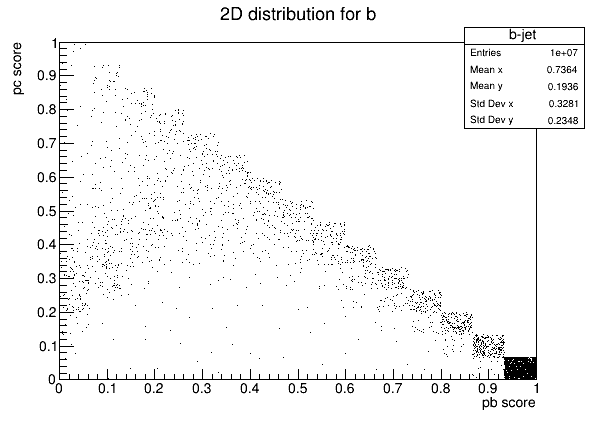

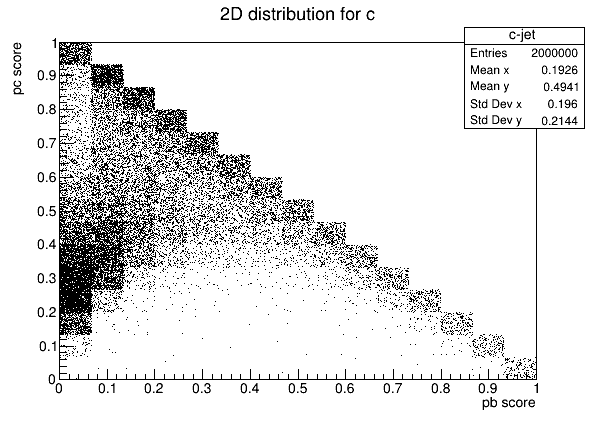

In [18]:
#plot 2d distribution for each jet with 1e5 scales of sample
num = int(1e7)
b = ROOT.TCanvas("b-jet {}".format(num),"The Canvas Title",600,450)
b_2D = ROOT.TH2F("b-jet", "2D distribution for b", 15, 0, 1, 15, 0, 1)
b_2D.FillN(num, b_jet[:, 0], b_jet[:, 1], 1/num*np.ones(num))
b_2D.Draw()
b.cd()
b_2D.GetYaxis().SetTitle("pc score")
b_2D.GetXaxis().SetTitle("pb score")
b.Draw()


num = int((1e7)/5)
c = ROOT.TCanvas("c-jet {}".format(num),"The Canvas Title",600,450)
c_2D = ROOT.TH2F("c-jet", "2D distribution for c", 15, 0, 1, 15, 0, 1)
c_2D.FillN(num, c_jet[:, 0], c_jet[:, 1], 1/num*np.ones(num))
c_2D.Draw()
c.cd()
c_2D.GetYaxis().SetTitle("pc score")
c_2D.GetXaxis().SetTitle("pb score")
c.Draw()


In [19]:
#train test split
X_t, X_test, y_t, y_test = train_test_split(data_X, data_y, test_size=10000000, random_state=114514)

In [20]:
#train validation split
X_train_full, X_vali, y_train_full, y_vali = train_test_split(X_t, y_t, test_size=50000, random_state=114514)
print(y_vali.shape)

(50000,)


### Generate the baseline performance data

In [21]:
#recompute baseline performance
y_baseline = y_test.reshape((y_test.shape[0], 1))
b_jet_test = X_test[y_baseline[:, 0] == 0]
c_jet_test = X_test[y_baseline[:, 0] == 1]

#Calculate ATLAS_score(ln(pc/pb))
b_ATLAS = np.log(np.divide(b_jet_test[:,1], b_jet_test[:,0]))
c_ATLAS = np.log(np.divide(c_jet_test[:,1], c_jet_test[:,0]))

#Calculate CMS_score(pc/(pc+pb))
b_CMS = np.divide(b_jet_test[:,1], b_jet_test[:, 0] + b_jet_test[:, 1])
c_CMS = np.divide(c_jet_test[:,1], c_jet_test[:, 0] + c_jet_test[:, 1])

b_len, c_len = b_jet_test.shape[0], c_jet_test.shape[0] #The total number of each jet

#calculate efficiency for two discriminant method
#ATLAS-score
print(np.max(b_ATLAS), np.min(b_ATLAS), np.max(c_ATLAS), np.min(c_ATLAS))
thresh_ATLAS = np.linspace(-5.45, 3.85, 100)
b_eff_ATLAS = np.array([np.count_nonzero((b_ATLAS > thresh)) for thresh in thresh_ATLAS])/b_len
c_eff_ATLAS = np.array([np.count_nonzero((c_ATLAS > thresh)) for thresh in thresh_ATLAS])/c_len
b_rej_ATLAS = 1/b_eff_ATLAS
print(np.max(b_CMS), np.min(b_CMS), np.max(c_CMS), np.min(c_CMS))
thresh_CMS = np.linspace(0.01, 0.979, 100)
b_eff_CMS = np.array([np.count_nonzero((b_CMS > thresh)) for thresh in thresh_CMS])/b_len
c_eff_CMS = np.array([np.count_nonzero((c_CMS > thresh)) for thresh in thresh_CMS])/c_len
b_rej_CMS = 1/b_eff_CMS

5.292378111198107 -18.84819027092911 5.780999400298741 -9.815904157698254
0.9949953874846685 6.521311848751205e-09 0.9969238617376472 5.457368599470575e-05


In [22]:
print(c_jet.shape[0]/(b_jet.shape[0]), b_jet.shape[0]/(b_jet.shape[0]+c_jet.shape[0]))


0.21509357492419073 0.8229818843889366


### Training with 10k samples

epoch = 20, batch size = 256, learning rate = 3e-4, <br>
optimizer: Adam, criterion: BCELoss; model name: model_10k, <br>
exponentially decaying learning rate with gamma = 0.9 <br>

In [62]:
#prepare training dataset
torch.manual_seed(114514)
X_train, y_train = X_train_full[:10000, :], y_train_full[:10000]

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model_10k = custom1(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model_10k.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst_10k, vali_accu_lst_10k = [], []
train_loss_lst_10k, vali_loss_lst_10k = [], []
model_10k.train()
for epoch in range(epochs):
    model_10k.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model_10k(X)
        #reconstruct criterion based on each data label
        #weight = torch.clone(y)
        #weight[weight[:, 0] == 0] = 0.21
        #criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst_10k.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model_10k.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model_10k(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model_10k.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst_10k.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model_10k.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model_10k(X)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model_10k.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst_10k.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst_10k.append(vali_accu)

device: cpu


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.6009412050247193
train accu: 0.5
vali accu: 0.5, vali loss: 0.4974481822276602


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.43099749460816383
train accu: 0.5
vali accu: 0.5, vali loss: 0.37597644237839445


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.33293713331222535
train accu: 0.756556867633275
vali accu: 0.7478482919466529, vali loss: 0.3114684827017541


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.30395321547985077
train accu: 0.7916017825985008
vali accu: 0.7940334431637129, vali loss: 0.30284794572056556


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.30037358961999416
train accu: 0.8098305421162543
vali accu: 0.8001258209062668, vali loss: 0.3028624331464573


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.29396447706967593
train accu: 0.7980105679415257
vali accu: 0.7901018162253836, vali loss: 0.300965960232579


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.29884588345885277
train accu: 0.7840537687322918
vali accu: 0.7777581066916436, vali loss: 0.30111905369831593


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.2989400696009398
train accu: 0.7877061988965188
vali accu: 0.787166947846672, vali loss: 0.2999922240875205


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.30444085113704206
train accu: 0.7831436470775733
vali accu: 0.7818131045147878, vali loss: 0.29998619367881696


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.29922705292701723
train accu: 0.7874442433986111
vali accu: 0.7830066268161289, vali loss: 0.29959983781588323


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.2943402089178562


/global/homes/r/ricardom/.conda/envs/root_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


train accu: 0.7854413349542637
vali accu: 0.7807437985360377, vali loss: 0.29922587135616613


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.2962513703852892
train accu: 0.7882201106295403
vali accu: 0.7798444564167015, vali loss: 0.29922523471165674


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.2941661514341831
train accu: 0.7916109358589496
vali accu: 0.7860989343759803, vali loss: 0.29895329140886967


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.2980507891625166
train accu: 0.7799114469361011
vali accu: 0.7859896299665123, vali loss: 0.2991264844883461


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.29120131507515906
train accu: 0.7857213875668749
vali accu: 0.7829989380273745, vali loss: 0.2989867084792682


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.2955196466296911
train accu: 0.7891110192107271
vali accu: 0.7806559985969391, vali loss: 0.29885243715680376


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.2954275593161583
train accu: 0.781349621120366
vali accu: 0.783377180287359, vali loss: 0.2987230938612198


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.2955330669879913
train accu: 0.7905120102587305
vali accu: 0.7796444051661406, vali loss: 0.2988382383268707


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.294166225194931
train accu: 0.7900907833236582
vali accu: 0.7814623076790415, vali loss: 0.29866555766487607


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.2942231338471174
train accu: 0.7843041666881078
vali accu: 0.7829580438519752, vali loss: 0.29857104895066244


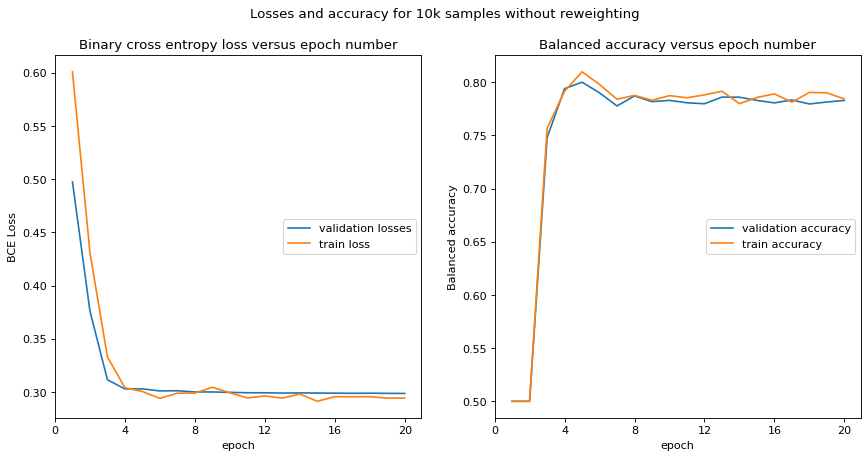

In [64]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for 10k samples without reweighting")
ax[0].plot(epochs, vali_loss_lst_10k, label = "validation losses")
ax[0].plot(epochs, train_loss_lst_10k, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number")
ax[0].legend(loc=5)

ax[1].plot(epochs, vali_accu_lst_10k, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst_10k, label = "train accuracy")
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number")
ax[1].legend(loc=5)
plt.show()


In [25]:
#Make prediction on test set with model_10k:
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred_10k = []
with torch.no_grad():
    model_10k.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model_10k(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred_10k.append(result)

pred_label_10k = np.concatenate(pred_10k)
print(pred_label_10k.shape)
    

  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)
0.670274 0.009166037 0.6706166 0.009169601


In [65]:
b_CUSTOM1_10k = pred_label_10k[pred_label_10k[:, 1] == 0]
c_CUSTOM1_10k = pred_label_10k[pred_label_10k[:, 1] == 1]
b_len, c_len = b_CUSTOM1_10k.shape[0], c_CUSTOM1_10k.shape[0]
print(np.max(b_CUSTOM1_10k[:,0]), np.min(b_CUSTOM1_10k[:,0]), np.max(c_CUSTOM1_10k[:,0]), np.min(c_CUSTOM1_10k[:,0]))

thresh_CUSTOM1_10k = np.linspace(0.01, 0.66, 100)
b_eff_CUSTOM1_10k = np.array([np.count_nonzero((b_CUSTOM1_10k[:, 0] > thresh)) for thresh in thresh_CUSTOM1_10k])/b_len
c_eff_CUSTOM1_10k = np.array([np.count_nonzero((c_CUSTOM1_10k[:, 0] > thresh)) for thresh in thresh_CUSTOM1_10k])/c_len
b_rej_CUSTOM1_10k = 1/b_eff_CUSTOM1_10k

0.670274 0.009166037 0.6706166 0.009169601


### Training with 10k samples with reweighting

In [66]:
#prepare training dataset
torch.manual_seed(114514)
X_train, y_train = X_train_full[:10000, :], y_train_full[:10000]

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model_10k_rw = custom1(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model_10k_rw.parameters(), lr = learning_rate)
#criterion = nn.BCELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst_10k_rw, vali_accu_lst_10k_rw = [], []
train_loss_lst_10k_rw, vali_loss_lst_10k_rw = [], []
model_10k_rw.train()
for epoch in range(epochs):
    model_10k_rw.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model_10k_rw(X)
        #reconstruct criterion based on each data label
        weight = torch.clone(y)
        weight[weight[:, 0] == 0] = 0.21
        criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst_10k_rw.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model_10k_rw.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model_10k_rw(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model_10k_rw.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst_10k_rw.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model_10k_rw.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model_10k_rw(X)
            weight = torch.clone(y)
            weight[weight[:, 0] == 0] = 0.21
            criterion = nn.BCELoss(weight = weight)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model_10k_rw.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst_10k_rw.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst_10k_rw.append(vali_accu)

device: cpu


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.23131165280938148
train accu: 0.5
vali accu: 0.5, vali loss: 0.21615459747156318


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.18860837183892726
train accu: 0.820141697001732
vali accu: 0.8174774896965756, vali loss: 0.15632066480359252


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.1434680424630642
train accu: 0.8237067951922082
vali accu: 0.823953374708782, vali loss: 0.1411130859383515


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.13925422057509423
train accu: 0.818841245657055
vali accu: 0.8222133565606705, vali loss: 0.14046996295908276


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.13927780389785765
train accu: 0.8239342974163254
vali accu: 0.8227962564363243, vali loss: 0.13957993442914923


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.1365723555907607
train accu: 0.8251247019358733
vali accu: 0.822922378714926, vali loss: 0.1391274418909939


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.13874331638216972
train accu: 0.8261356150260685
vali accu: 0.8235824899095234, vali loss: 0.13881423731087422


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.1381529675796628
train accu: 0.8262142235821524
vali accu: 0.8235759904895422, vali loss: 0.1385075467429599


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.14353638365864754
train accu: 0.8183577900738168
vali accu: 0.8239699381637863, vali loss: 0.13845202957793157


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.1404872452840209
train accu: 0.8256672880872188
vali accu: 0.8236032652794986, vali loss: 0.13845312606771382


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.1371732072904706


/global/homes/r/ricardom/.conda/envs/root_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


train accu: 0.8173362356998801
vali accu: 0.8233031737164873, vali loss: 0.13827947173647734


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.13857458606362344
train accu: 0.822860128598766
vali accu: 0.8239349379799392, vali loss: 0.13823648238060426


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.13673189841210842
train accu: 0.8262650300713688
vali accu: 0.8236943583841119, vali loss: 0.13805777378076192


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.13912024144083263
train accu: 0.8175718653119144
vali accu: 0.8233489409121946, vali loss: 0.1382330399462763


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.13592828419059516
train accu: 0.8257209087092591
vali accu: 0.8236158371087063, vali loss: 0.13804578245142285


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.13743682503700255
train accu: 0.8271231453656285
vali accu: 0.8239634216068339, vali loss: 0.13803454838236984


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.13783143721520902
train accu: 0.8204525141248766
vali accu: 0.8235576659530045, vali loss: 0.13796214664316908


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.1370589414611459
train accu: 0.8268511308202958
vali accu: 0.8234944761004986, vali loss: 0.1380428067047377


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.1365903090685606
train accu: 0.826149487500692
vali accu: 0.8237016820180966, vali loss: 0.1379791720561227


  0%|          | 0/40 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.13675870150327682
train accu: 0.8269807039686228
vali accu: 0.8234629149185602, vali loss: 0.1379127565923394


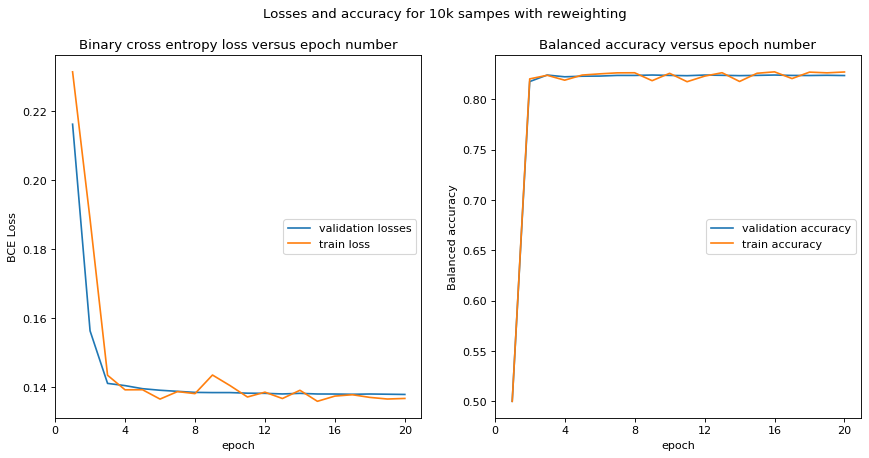

In [68]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for 10k sampes with reweighting")
ax[0].plot(epochs, vali_loss_lst_10k_rw, label = "validation losses")
ax[0].plot(epochs, train_loss_lst_10k_rw, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number")
ax[0].legend(loc=5)

ax[1].plot(epochs, vali_accu_lst_10k_rw, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst_10k_rw, label = "train accuracy")
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number")
ax[1].legend(loc=5)
plt.show()

In [40]:
#Make prediction on test set with model_10k:
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred_10k_rw = []
with torch.no_grad():
    model_10k_rw.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model_10k_rw(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred_10k_rw.append(result)

pred_label_10k_rw = np.concatenate(pred_10k_rw)
print(pred_label_10k_rw.shape)


  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)
0.9143234 0.031537384 0.9148598 0.031552114


In [42]:
b_CUSTOM1_10k_rw = pred_label_10k_rw[pred_label_10k_rw[:, 1] == 0]
c_CUSTOM1_10k_rw = pred_label_10k_rw[pred_label_10k_rw[:, 1] == 1]
b_len, c_len = b_CUSTOM1_10k_rw.shape[0], c_CUSTOM1_10k_rw.shape[0]
print(np.max(b_CUSTOM1_10k_rw[:,0]), np.min(b_CUSTOM1_10k_rw[:,0]), np.max(c_CUSTOM1_10k_rw[:,0]), np.min(c_CUSTOM1_10k_rw[:,0]))

thresh_CUSTOM1_10k_rw = np.linspace(0.02, 0.90, 100)
b_eff_CUSTOM1_10k_rw = np.array([np.count_nonzero((b_CUSTOM1_10k_rw[:, 0] > thresh)) for thresh in thresh_CUSTOM1_10k_rw])/b_len
c_eff_CUSTOM1_10k_rw = np.array([np.count_nonzero((c_CUSTOM1_10k_rw[:, 0] > thresh)) for thresh in thresh_CUSTOM1_10k_rw])/c_len
b_rej_CUSTOM1_10k_rw = 1/b_eff_CUSTOM1_10k_rw

0.9143234 0.031537384 0.9148598 0.031552114


### Draw roc curve to see the performance

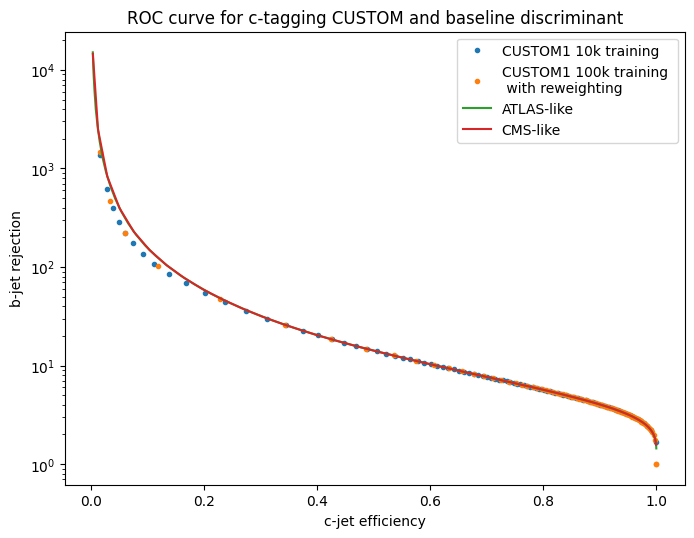

In [69]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(c_eff_CUSTOM1_10k, b_rej_CUSTOM1_10k, ".", label = "CUSTOM1 10k training")
plt.plot(c_eff_CUSTOM1_10k_rw, b_rej_CUSTOM1_10k_rw, ".", label = "CUSTOM1 100k training \n with reweighting")
#plt.plot(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, ".", label = "CUSTOM1 100k training \n with reweighting")
#plt.plot(c_eff_CUSTOM1w, b_rej_CUSTOM1w, label = "CUSTOM1 without reweighting")
plt.plot(c_eff_ATLAS, b_rej_ATLAS,  label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline discriminant")
plt.legend()
plt.show()

### Training with 100k samples

In [70]:
#prepare training dataset
torch.manual_seed(114514)
X_train, y_train = X_train_full[10000:110000, :], y_train_full[10000:110000]

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model_100k = custom1(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model_100k.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst_100k, vali_accu_lst_100k = [], []
train_loss_lst_100k, vali_loss_lst_100k = [], []
model_100k.train()
for epoch in range(epochs):
    model_100k.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model_100k(X)
        #reconstruct criterion based on each data label
        #weight = torch.clone(y)
        #weight[weight[:, 0] == 0] = 0.21
        #criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst_100k.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model_100k.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model_100k(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model_100k.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst_100k.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model_100k.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model_100k(X)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model_100k.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst_100k.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst_100k.append(vali_accu)

device: cpu


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.3441833415833276
train accu: 0.7816010206357954
vali accu: 0.7790046037690507, vali loss: 0.29762294941714834


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.29475928214200015
train accu: 0.7784695023351711
vali accu: 0.775865425084369, vali loss: 0.29543230211248206


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.29337819518945407
train accu: 0.7718254246338662
vali accu: 0.7697925684325422, vali loss: 0.2946372497446683


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.29262779050928245
train accu: 0.7647296920932011
vali accu: 0.762036636800227, vali loss: 0.29423738955234996


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.29209145034670525
train accu: 0.7560284458700981
vali accu: 0.7529590765483613, vali loss: 0.294314301667773


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.29201995255544666
train accu: 0.7551859981415503
vali accu: 0.7528352938917113, vali loss: 0.2937489165639391


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.29170825338119744
train accu: 0.7562806678339568
vali accu: 0.7527279582240549, vali loss: 0.2938904497696429


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.2915600193354785
train accu: 0.7692428894793171
vali accu: 0.7662895967897944, vali loss: 0.29317575320601463


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.29111323896271496
train accu: 0.7598662561661246
vali accu: 0.7567739800250443, vali loss: 0.2934662267109569


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.2912165089641386
train accu: 0.7498361014964171
vali accu: 0.7478065003519726, vali loss: 0.29370866708305415


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.29107646285877814
train accu: 0.7641876442297525
vali accu: 0.760955451350275, vali loss: 0.292829372140826


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.2909785228998155
train accu: 0.7579188625340716
vali accu: 0.7550711811965077, vali loss: 0.293079070366767


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.2910021022152718
train accu: 0.7682653273100745
vali accu: 0.7644490499494406, vali loss: 0.29274232906042313


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.29081670615984045
train accu: 0.7664894018941871
vali accu: 0.7634184448174115, vali loss: 0.29299074168107947


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.2907160058655702
train accu: 0.7673595575484081
vali accu: 0.7645295752654802, vali loss: 0.2930120764946451


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.29068248034895533
train accu: 0.7642703808729993
vali accu: 0.7606323054197675, vali loss: 0.2928903476164049


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.2905912465222961
train accu: 0.7639551458036166
vali accu: 0.7617399744330626, vali loss: 0.2928482360985814


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.290617443563993
train accu: 0.7586885293524899
vali accu: 0.7537830806624909, vali loss: 0.2930425581123148


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.2905481929516853
train accu: 0.7596971158289333
vali accu: 0.7560286598270467, vali loss: 0.29289761003182857


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.29055882513980424
train accu: 0.7659683275088708
vali accu: 0.7634651288856511, vali loss: 0.2928034189556326


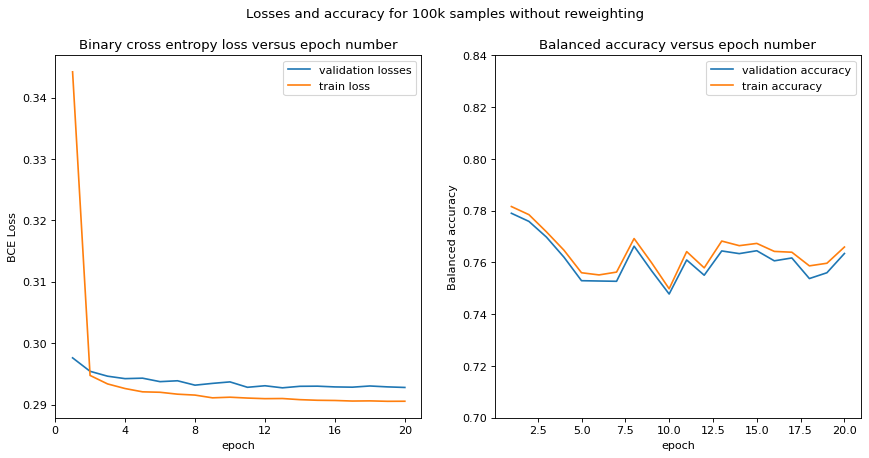

In [73]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for 100k samples without reweighting")
ax[0].plot(epochs, vali_loss_lst_100k, label = "validation losses")
ax[0].plot(epochs, train_loss_lst_100k, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number")
ax[0].legend(loc=1)

ax[1].plot(epochs, vali_accu_lst_100k, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst_100k, label = "train accuracy")
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_ylim(0.7, 0.84)
ax[1].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number")
ax[1].legend(loc=1)
plt.show()


In [75]:
#Make prediction on test set with model_100k:
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred_100k = []
with torch.no_grad():
    model_100k.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model_100k(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred_100k.append(result)

pred_label_100k = np.concatenate(pred_100k)
print(pred_label_100k.shape)

  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)


In [77]:
b_CUSTOM1_100k = pred_label_100k[pred_label_100k[:, 1] == 0]
c_CUSTOM1_100k = pred_label_100k[pred_label_100k[:, 1] == 1]
b_len, c_len = b_CUSTOM1_100k.shape[0], c_CUSTOM1_100k.shape[0]
print(np.max(b_CUSTOM1_100k[:,0]), np.min(b_CUSTOM1_100k[:,0]), np.max(c_CUSTOM1_100k[:,0]), np.min(c_CUSTOM1_100k[:,0]))

thresh_CUSTOM1_100k = np.linspace(0.01, 0.82, 100)
b_eff_CUSTOM1_100k = np.array([np.count_nonzero((b_CUSTOM1_100k[:, 0] > thresh)) for thresh in thresh_CUSTOM1_100k])/b_len
c_eff_CUSTOM1_100k = np.array([np.count_nonzero((c_CUSTOM1_100k[:, 0] > thresh)) for thresh in thresh_CUSTOM1_100k])/c_len
b_rej_CUSTOM1_100k = 1/b_eff_CUSTOM1_100k

0.82056564 0.0017623922 0.8217555 0.0017650594


### Training with 100k sample with reweighting

In [78]:
#prepare training dataset
torch.manual_seed(114514)
X_train, y_train = X_train_full[10000:110000, :], y_train_full[10000:110000]

dataset_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
dataset_vali = torch.utils.data.TensorDataset(torch.from_numpy(X_vali), torch.from_numpy(y_vali))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

#set training hyperparameter for training:
epochs = 20
batch_size = 256
learning_rate = 3e-4
num_features = 2 #for this prototyping NN, only use pb and pc as the input features
model_100k_rw = custom1(num_features).to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model_100k_rw.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size, shuffle = True)
dataloader_vali = torch.utils.data.DataLoader(dataset_vali, batch_size = batch_size, shuffle = True) 

train_accu_lst_100k_rw, vali_accu_lst_100k_rw = [], []
train_loss_lst_100k_rw, vali_loss_lst_100k_rw = [], []
model_100k_rw.train()
for epoch in range(epochs):
    model_100k_rw.train()
    train_losses = []
    for X, y in tqdm.notebook.tqdm(dataloader_train, unit= "batch"):
        optimizer.zero_grad()
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        prediction = model_100k_rw(X)
        #reconstruct criterion based on each data label
        weight = torch.clone(y)
        weight[weight[:, 0] == 0] = 0.21
        criterion = nn.BCELoss(weight = weight)
        loss = criterion(prediction, y)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    scheduler.step()
    mean_loss = np.mean(train_losses)
    train_loss_lst_100k_rw.append(mean_loss)
    print("Finished Epoch", epoch+1, ", training loss:", mean_loss)
    
    #training accuracy
    with torch.no_grad():
        model_100k_rw.eval() #evaluation mode
        accu_list = []
        for train_data in dataloader_train:
            X, y = train_data[0], train_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            prediction = model_100k_rw(X)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
        model_100k_rw.train()
        train_accu = np.mean(accu_list)
        print("train accu:", train_accu)
        train_accu_lst_100k_rw.append(train_accu)

    #validation accuracy
    with torch.no_grad():
        model_100k_rw.eval()
        #Calculate the validation accuray
        accu_list = []
        validation_losses = []
        for vali_data in dataloader_vali:
            X, y = vali_data[0], vali_data[1]
            X, y = X.float().to(device), y.float().to(device)
            y = y.view(y.size(0), -1)
            
            prediction = model_100k_rw(X)
            weight = torch.clone(y)
            weight[weight[:, 0] == 0] = 0.21
            criterion = nn.BCELoss(weight = weight)
            loss = criterion(prediction, y)

            prediction = np.round(prediction.numpy() + 0.1)
            #accu = np.count_nonzero(prediction == y.numpy())
            accu = sklearn.metrics.balanced_accuracy_score(y.numpy(), prediction)
            accu_list.append(accu)
            validation_losses.append(loss.item())
        model_100k_rw.train()
        mean_loss = np.mean(validation_losses)
        vali_loss_lst_100k_rw.append(mean_loss)

        vali_accu = np.mean(accu_list)
        print(f"vali accu: {vali_accu}, vali loss: {mean_loss}")
        vali_accu_lst_100k_rw.append(vali_accu)

device: cpu


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.15196211207324586
train accu: 0.8229469882724545
vali accu: 0.8220789855969335, vali loss: 0.13735321977612924


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.13627302376053219
train accu: 0.8221510197556349
vali accu: 0.8207724912611403, vali loss: 0.13620618841021645


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.1354114543789488
train accu: 0.8220221359273616
vali accu: 0.8212229000351812, vali loss: 0.13582642433442632


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.1349768738650605
train accu: 0.8203257688605028
vali accu: 0.8196988802917148, vali loss: 0.13546809345027622


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.13470272348283807
train accu: 0.8222069076625449
vali accu: 0.8217175446187441, vali loss: 0.13552539168419886


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.1346981037417641
train accu: 0.8200391651511436
vali accu: 0.8191451369942044, vali loss: 0.135094660657401


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.13454196666893753
train accu: 0.8214339126859764
vali accu: 0.8205074712407333, vali loss: 0.13530960705663478


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.13449653794469735
train accu: 0.8195772912497409
vali accu: 0.8180940852786128, vali loss: 0.13505853606121881


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.13432041271720702
train accu: 0.8217076321785557
vali accu: 0.8211916344679256, vali loss: 0.1350942362784123


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.13431780282265085
train accu: 0.8220427264236896
vali accu: 0.821859706956587, vali loss: 0.13508766178725934


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.13426998867403211
train accu: 0.8191158289907023
vali accu: 0.8178324585823, vali loss: 0.13499498572580668


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.1342336061170034
train accu: 0.8223288904310009
vali accu: 0.8220617480449312, vali loss: 0.13511832153462633


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.1342273118055385
train accu: 0.8183779205069666
vali accu: 0.816644959248599, vali loss: 0.13509703925525657


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.13414715325740903
train accu: 0.8215365093242643
vali accu: 0.8207064732151971, vali loss: 0.13491220513776858


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.13408536509708371
train accu: 0.8200993099222749
vali accu: 0.8185417776604558, vali loss: 0.13481639272400311


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 16 , training loss: 0.134056988789145
train accu: 0.8221456773311696
vali accu: 0.8212238064140465, vali loss: 0.1348532058526667


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 17 , training loss: 0.13402595529166025
train accu: 0.8189072948705767
vali accu: 0.817963084987313, vali loss: 0.13487658071882871


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 18 , training loss: 0.1340259868661156
train accu: 0.8221791380746515
vali accu: 0.8213594322793923, vali loss: 0.1349800854009025


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 19 , training loss: 0.13399328239967145
train accu: 0.8207752252097187
vali accu: 0.8197840860577172, vali loss: 0.1348245561274947


  0%|          | 0/391 [00:00<?, ?batch/s]

Finished Epoch 20 , training loss: 0.13399669341266612
train accu: 0.8211001910989724
vali accu: 0.8200622791575745, vali loss: 0.1347670023690681


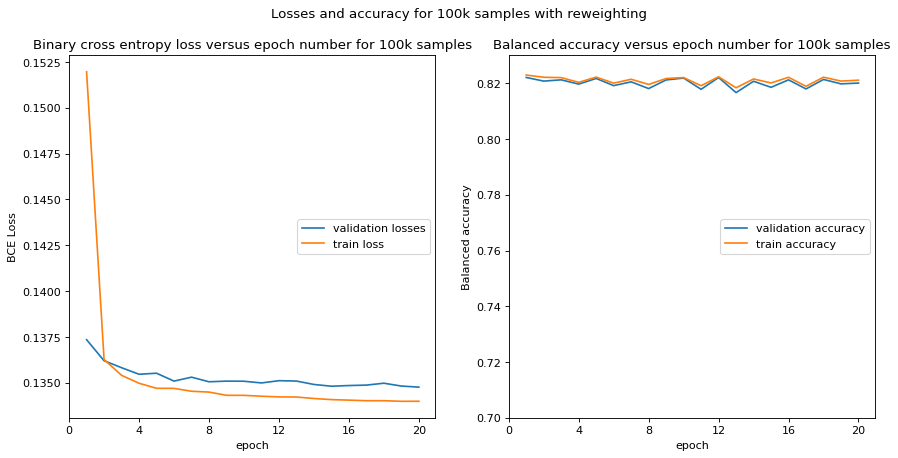

In [80]:
#plot the loss and accuracy versus epoch
epochs = range(1,21)
fig, ax = plt.subplots(1, 2, figsize=(13,6), dpi=80)
fig.suptitle("Losses and accuracy for 100k samples with reweighting")
ax[0].plot(epochs, vali_loss_lst_100k_rw, label = "validation losses")
ax[0].plot(epochs, train_loss_lst_100k_rw, label = "train loss")
ax[0].set_ylabel("BCE Loss")
ax[0].set_xlabel("epoch")
ax[0].set_xticks(np.arange(0,21,4))
ax[0].set_title("Binary cross entropy loss versus epoch number for 100k samples")
ax[0].legend(loc=5)

ax[1].plot(epochs, vali_accu_lst_100k_rw, label = "validation accuracy")
ax[1].plot(epochs, train_accu_lst_100k_rw, label = "train accuracy")
ax[1].set_ylim(0.7, 0.83)
ax[1].set_ylabel("Balanced accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_xticks(np.arange(0,21,4))
ax[1].set_title("Balanced accuracy versus epoch number for 100k samples")
ax[1].legend(loc=5)
plt.show()

In [83]:
#Make prediction on test set with model_100k:
dataset_test = torch.utils.data.TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size, shuffle = True)
pred_100k_rw = []
with torch.no_grad():
    model_100k_rw.eval()
    for X, y in tqdm.notebook.tqdm(dataloader_test, unit = "batch"):
        X, y = X.float().to(device), y.float().to(device)
        y = y.view(y.size(0), -1)
        output = model_100k_rw(X)
        output = output.numpy()
        y = y.numpy()
        result = np.hstack((output,y))
        pred_100k_rw.append(result)

pred_label_100k_rw = np.concatenate(pred_100k_rw)
print(pred_label_100k_rw.shape)

  0%|          | 0/39063 [00:00<?, ?batch/s]

(10000000, 2)


In [85]:
b_CUSTOM1_100k_rw = pred_label_100k_rw[pred_label_100k_rw[:, 1] == 0]
c_CUSTOM1_100k_rw = pred_label_100k_rw[pred_label_100k_rw[:, 1] == 1]
b_len, c_len = b_CUSTOM1_100k_rw.shape[0], c_CUSTOM1_100k_rw.shape[0]
print(np.max(b_CUSTOM1_100k_rw[:,0]), np.min(b_CUSTOM1_100k_rw[:,0]), np.max(c_CUSTOM1_100k_rw[:,0]), np.min(c_CUSTOM1_100k_rw[:,0]))

thresh_CUSTOM1_100k_rw = np.linspace(0.01, 0.94, 100)
b_eff_CUSTOM1_100k_rw = np.array([np.count_nonzero((b_CUSTOM1_100k_rw[:, 0] > thresh)) for thresh in thresh_CUSTOM1_100k_rw])/b_len
c_eff_CUSTOM1_100k_rw = np.array([np.count_nonzero((c_CUSTOM1_100k_rw[:, 0] > thresh)) for thresh in thresh_CUSTOM1_100k_rw])/c_len
b_rej_CUSTOM1_100k_rw = 1/b_eff_CUSTOM1_100k_rw

0.94673556 0.00630366 0.9470766 0.006317597


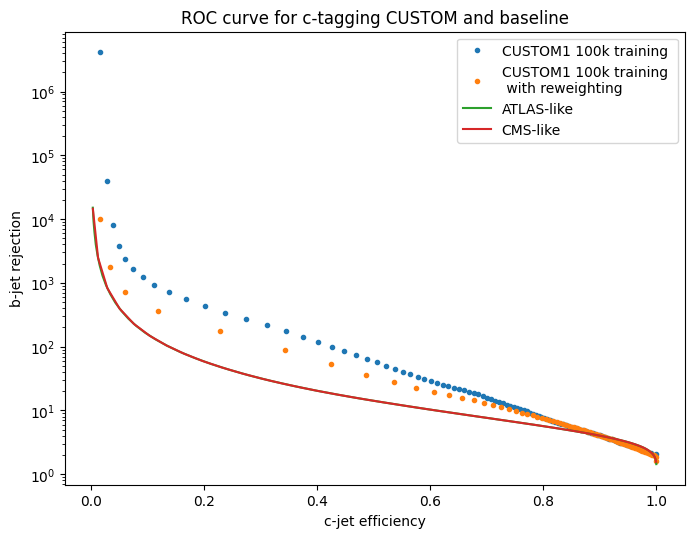

In [86]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(c_eff_CUSTOM1_10k, b_rej_CUSTOM1_100k, ".", label = "CUSTOM1 100k training")
plt.plot(c_eff_CUSTOM1_10k_rw, b_rej_CUSTOM1_100k_rw, ".", label = "CUSTOM1 100k training \n with reweighting")
#plt.plot(c_eff_CUSTOM1_100k, b_rej_CUSTOM1_100k, ".", label = "CUSTOM1 100k training \n with reweighting")
#plt.plot(c_eff_CUSTOM1w, b_rej_CUSTOM1w, label = "CUSTOM1 without reweighting")
plt.plot(c_eff_ATLAS, b_rej_ATLAS,  label = "ATLAS-like")
plt.plot(c_eff_CMS, b_rej_CMS, label = "CMS-like")
plt.yscale("log", base = 10)
plt.xlabel("c-jet efficiency")
plt.ylabel("b-jet rejection")
plt.title("ROC curve for c-tagging CUSTOM and baseline")
plt.legend()
plt.show()